In [38]:
# Importing all the required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [39]:
# Reading the csv file
df = pd.read_csv("features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [40]:
# Shape of the data
df.shape

(9990, 60)

In [41]:
# Data type of the data
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [42]:
# Loading a sample audio from the dataset
audio ="genres_original/reggae/reggae.00010.wav"
data,sr=librosa.load(audio)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [43]:
# Initializing sample rate to 45600 we obtain the signal value array
librosa.load(audio,sr=45600)

(array([-0.00555292, -0.00768963, -0.00668519, ...,  0.08035275,
         0.0663713 ,  0.03239053], dtype=float32),
 45600)

In [44]:
# Taking Short-time Fourier transform of the signal
y = librosa.stft(data)  
S_db = librosa.amplitude_to_db(np.abs(y), ref=np.max)

In [45]:
# Playing audio file
import IPython
IPython.display.Audio(data,rate=sr)

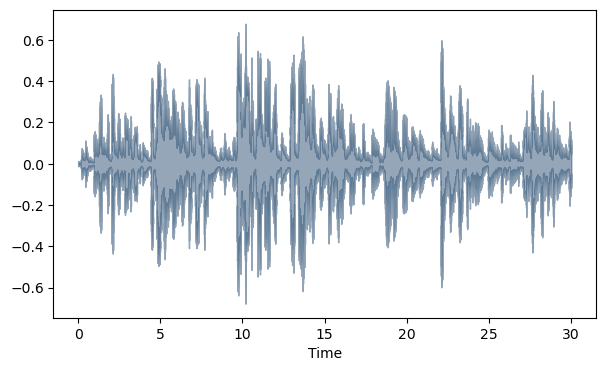

In [46]:
# Wave form of the audio
plt.figure(figsize=(7,4))
librosa.display.waveshow(data,color="#2B4F72", alpha = 0.5)
plt.show()

In [47]:
# Label Encoding - encod the categorical classes with numerical integer values for training

# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4 
# Jazz - 5  
# Metal - 6 
# Pop - 7
# Reggae - 8
# Rock - 9

class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, ..., 9, 9, 9])

In [48]:
#features
print(df.iloc[:,:-1])

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [49]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels="filename",axis=1)

In [50]:
#scaling
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [51]:
# splitting 70% data into training set and the remaining 30% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [52]:
# test data size
len(y_test)

2997

In [53]:
# size of training data
len(y_train)

6993

Training set score: 0.952
Test set score: 0.894
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       296
           1       0.89      0.93      0.91       302
           2       0.83      0.86      0.84       308
           3       0.82      0.95      0.88       275
           4       0.91      0.88      0.90       287
           5       0.90      0.85      0.87       317
           6       0.98      0.93      0.96       307
           7       0.92      0.88      0.90       266
           8       0.91      0.94      0.92       305
           9       0.93      0.79      0.85       334

    accuracy                           0.89      2997
   macro avg       0.90      0.90      0.89      2997
weighted avg       0.90      0.89      0.89      2997



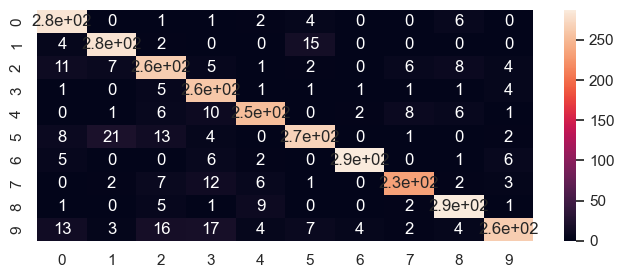

In [54]:
# Applying K nearest Neighbour algorithm to predict the results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(X_test, y_test)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(8,3)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test,y_pred))

Training set score: 0.919
Test set score: 0.846
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       296
           1       0.89      0.96      0.93       302
           2       0.79      0.82      0.80       308
           3       0.76      0.83      0.79       275
           4       0.87      0.82      0.84       287
           5       0.86      0.87      0.87       317
           6       0.90      0.91      0.91       307
           7       0.88      0.87      0.87       266
           8       0.84      0.83      0.84       305
           9       0.84      0.68      0.75       334

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.84      2997



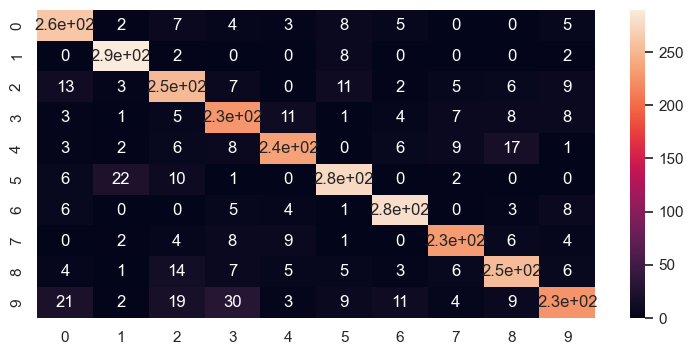

In [55]:
# Applying Support Vector Machines to predict the results
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))

Training set score: 0.919
Test set score: 0.846
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       296
           1       0.89      0.96      0.93       302
           2       0.79      0.82      0.80       308
           3       0.76      0.83      0.79       275
           4       0.87      0.82      0.84       287
           5       0.86      0.87      0.87       317
           6       0.90      0.91      0.91       307
           7       0.88      0.87      0.87       266
           8       0.84      0.83      0.84       305
           9       0.84      0.68      0.75       334

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.84      2997



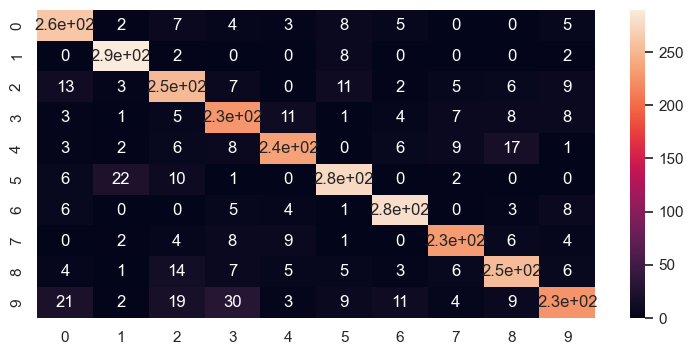

In [56]:
# Applying Support Vector Machines to predict the results
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        30,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,098 (801.16 KB)

 Trainable params: 205,098 (801.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.1228 - loss: 2.3223 - val_accuracy: 0.2896 - val_loss: 2.2130
Epoch 2/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1982 - loss: 2.2162 - val_accuracy: 0.3126 - val_loss: 2.0419
Epoch 3/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2614 - loss: 2.0779 - val_accuracy: 0.3560 - val_loss: 1.8854
Epoch 4/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2938 - loss: 1.9635 - val_accuracy: 0.3697 - val_loss: 1.7559
Epoch 5/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3420 - loss: 1.8607 - val_accuracy: 0.4178 - val_loss: 1.6445
Epoch 6/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3643 - loss: 1.7900 - val_accuracy: 0.4661 - val_loss: 1.5505
Epoch 7/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3861 - loss: 1.7337 - val_accuracy: 0.4815 - val_loss: 1.4782
Epoch 8/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4235 - loss: 1.6342 - val_accuracy: 0.5038 -

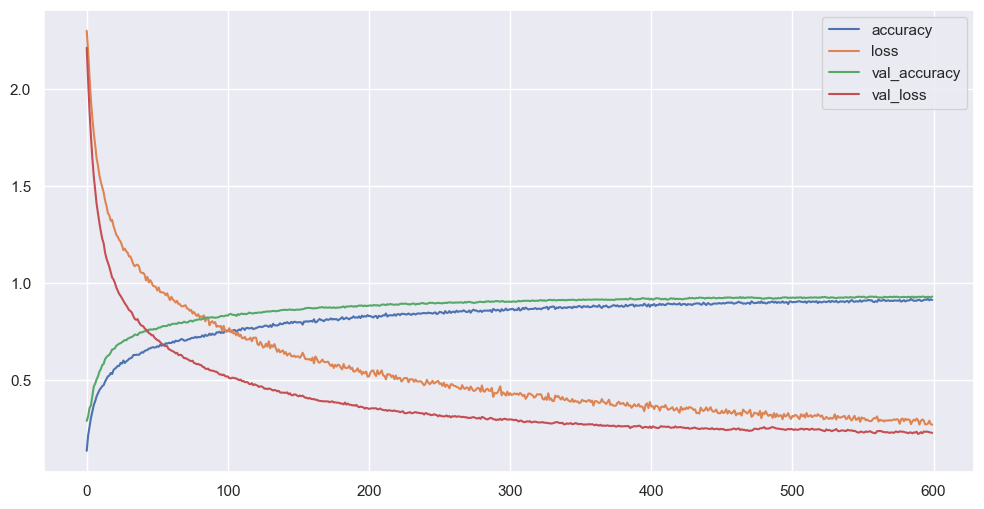

In [60]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

# Function to train the model
def train_model(model, epochs, optimizer):
    batch_size = 256
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Function to plot validation accuracy
def Validation_plot(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000146)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model_history = train_model(model=model, epochs=600, optimizer=optimizer)

# Plot validation accuracy
Validation_plot(model_history)


In [61]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=256)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9341 - loss: 0.2211 
The test loss is  0.228055939078331
The best accuracy is:  93.05972456932068


Validation Accuracy 0.9305972456932068


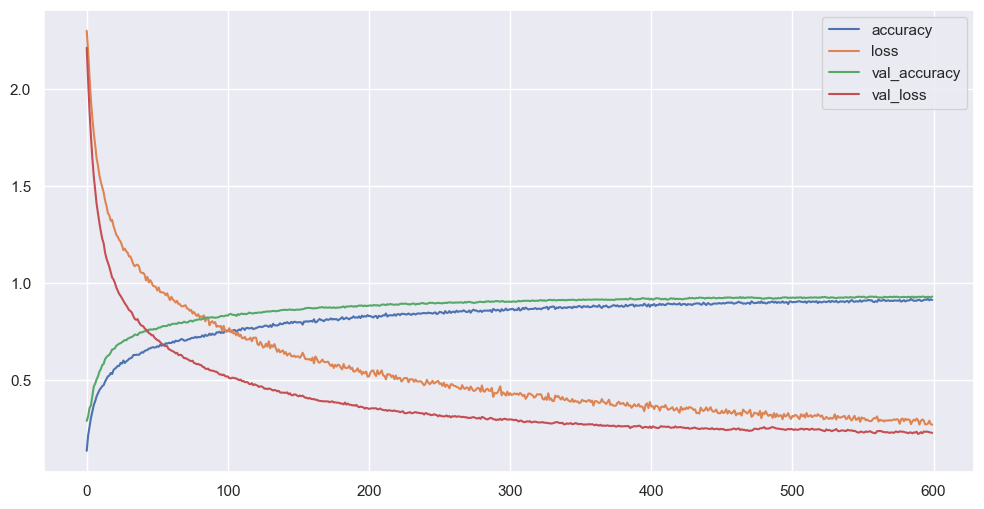

In [62]:
# The plot dipicts how training and testing data performed
Validation_plot(model_history)

In [63]:
# Sample testing
sample = X_test
sample = sample[np.newaxis, ...]
prediction = model.predict(X_test)
predicted_index = np.argmax(prediction, axis = 1)
print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_index))

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Expected Index: [2 2 2 ... 3 1 9], Predicted Index: [2 2 2 ... 3 1 8]


In [64]:
# Plotting the confusion matrix for analizing the true positives and negatives
import seaborn as sn
import matplotlib.pyplot as plt
pred_x = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_index )
cm

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[285,   1,   2,   2,   2,   3,   0,   0,   0,   1],
       [  0, 290,   2,   0,   0,   9,   0,   0,   1,   0],
       [  5,   2, 279,   1,   0,   6,   0,   5,   3,   7],
       [  1,   0,   0, 260,   5,   1,   3,   1,   2,   2],
       [  0,   0,   5,   4, 273,   1,   0,   3,   1,   0],
       [  3,  12,   7,   0,   0, 293,   0,   1,   1,   0],
       [  3,   0,   0,   1,   3,   1, 290,   0,   2,   7],
       [  0,   1,   4,   3,   8,   0,   0, 242,   4,   4],
       [  0,   0,   2,   0,   5,   2,   0,   3, 292,   1],
       [  5,   1,  14,  11,   2,   1,   6,   3,   6, 285]], dtype=int64)

C:\Users\Harsh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        30,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,098 (801.16 KB)

 Trainable params: 205,098 (801.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1058 - loss: 2.3282 - val_accuracy: 0.2379 - val_loss: 2.2250
Epoch 2/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1853 - loss: 2.2194 - val_accuracy: 0.2723 - val_loss: 2.0799
Epoch 3/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2275 - loss: 2.1016 - val_accuracy: 0.3283 - val_loss: 1.9130
Epoch 4/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2669 - loss: 1.9914 - val_accuracy: 0.3844 - val_loss: 1.7962
Epoch 5/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3338 - loss: 1.8890 - val_accuracy: 0.4037 - val_loss: 1.7033
Epoch 6/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3550 - loss: 1.8241 - val_accuracy: 0.4471 - val_loss: 1.6036
Epoch 7/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3873 - loss: 1.7466 - val_accuracy: 0.4748 - val_loss: 1.5289
Epoch 8/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3926 - loss: 1.7166 - val_accuracy: 0.4918 -

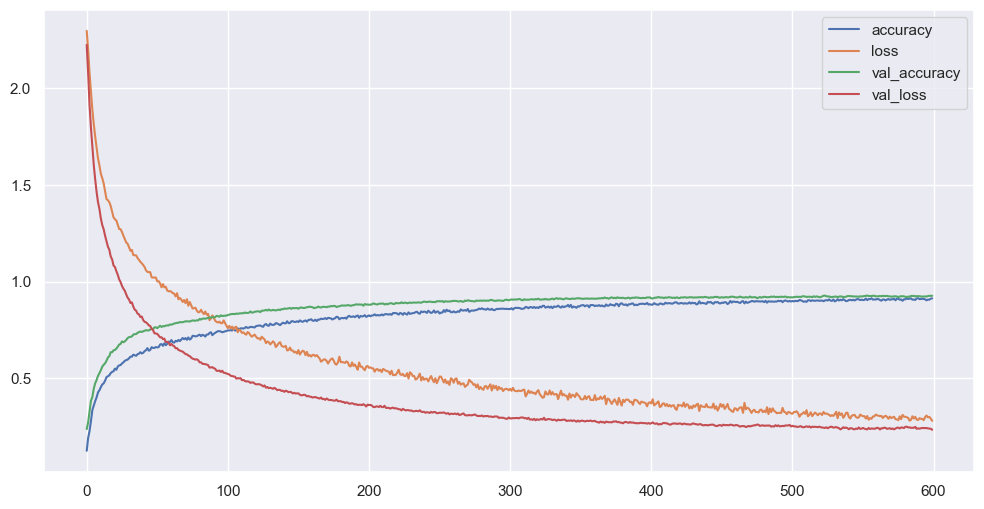

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 58, but received input with shape (1, 13)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 13), dtype=float32)
  • training=False
  • mask=None

In [66]:
import numpy as np
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# Preprocessing function
def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, duration=30)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Function to train the model
def train_model(model, epochs, optimizer):
    batch_size = 256
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Function to plot validation accuracy
def Validation_plot(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000146)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model_history = train_model(model=model, epochs=600, optimizer=optimizer)

# Plot validation accuracy
Validation_plot(model_history)

# File path to the random song
file_path = 'genres_original/blues/blues.00001.wav'

# Preprocess the audio file
mfccs_mean = preprocess_audio(file_path)

# Ensure the input shape matches the model's expected input shape
mfccs_mean = mfccs_mean.reshape(1, -1)

# Make a prediction
prediction = model.predict(mfccs_mean)

# Get the predicted genre index
predicted_genre_index = np.argmax(prediction, axis=1)

# Define the genre labels
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Get the predicted genre
predicted_genre = genre_labels[predicted_genre_index[0]]
print(f'The predicted genre is: {predicted_genre}')
